In [ ]:
#Mugdha Arvind
#Codsoft internship task 3

In [ ]:
'''TASK 4 - SALES PREDICTION USING PYTHON

-Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
-In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.'''

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset

In [3]:
data = pd.read_csv('advertising.csv')
#dataset from https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [4]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#Handling Null values

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#Check for outliers

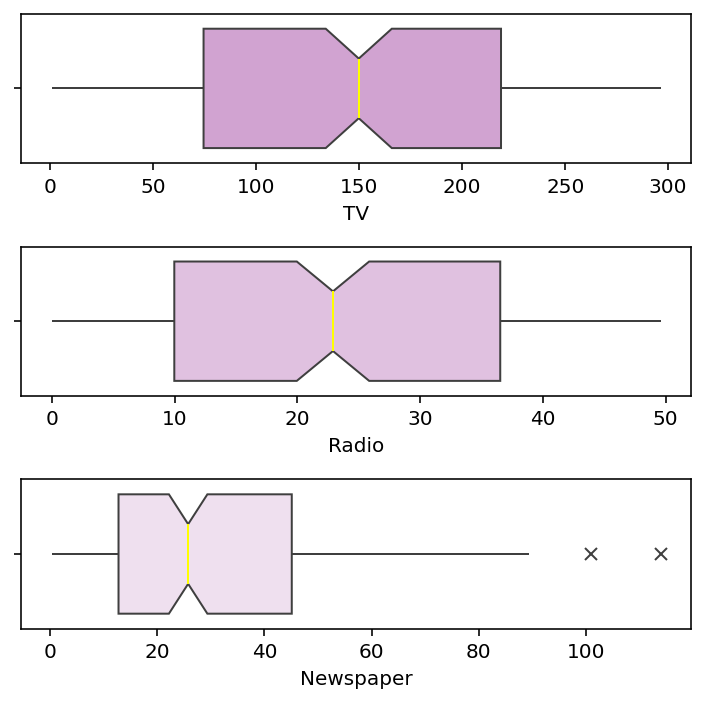

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x = data['TV'], ax=axs[0], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.8, .6, .8, .9)},
    medianprops={"color": "yellow"})
plt2 = sns.boxplot(x = data['Radio'],ax=axs[1], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.8, .6, .8, .6)},
    medianprops={"color": "yellow"})
plt3 = sns.boxplot(x = data['Newspaper'],ax=axs[2], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.8, .6, .8, .3)},
    medianprops={"color": "yellow"})

plt.tight_layout()


In [12]:
#Analysis

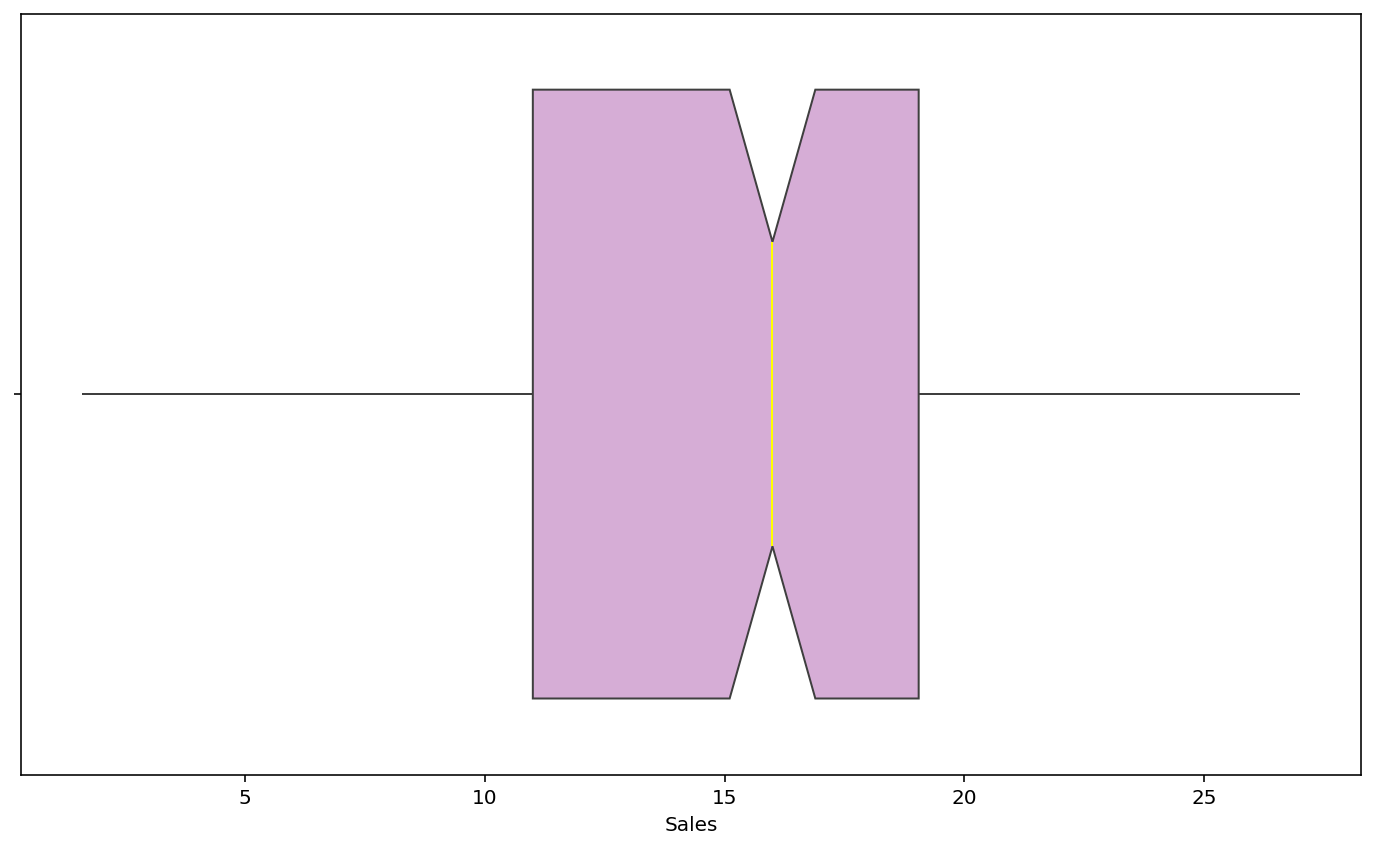

In [13]:
sns.boxplot(x= data['Sales'],  notch = True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.8, .6, .8, .8)},
    medianprops={"color": "yellow"})
plt.show()

In [14]:
#Correlation

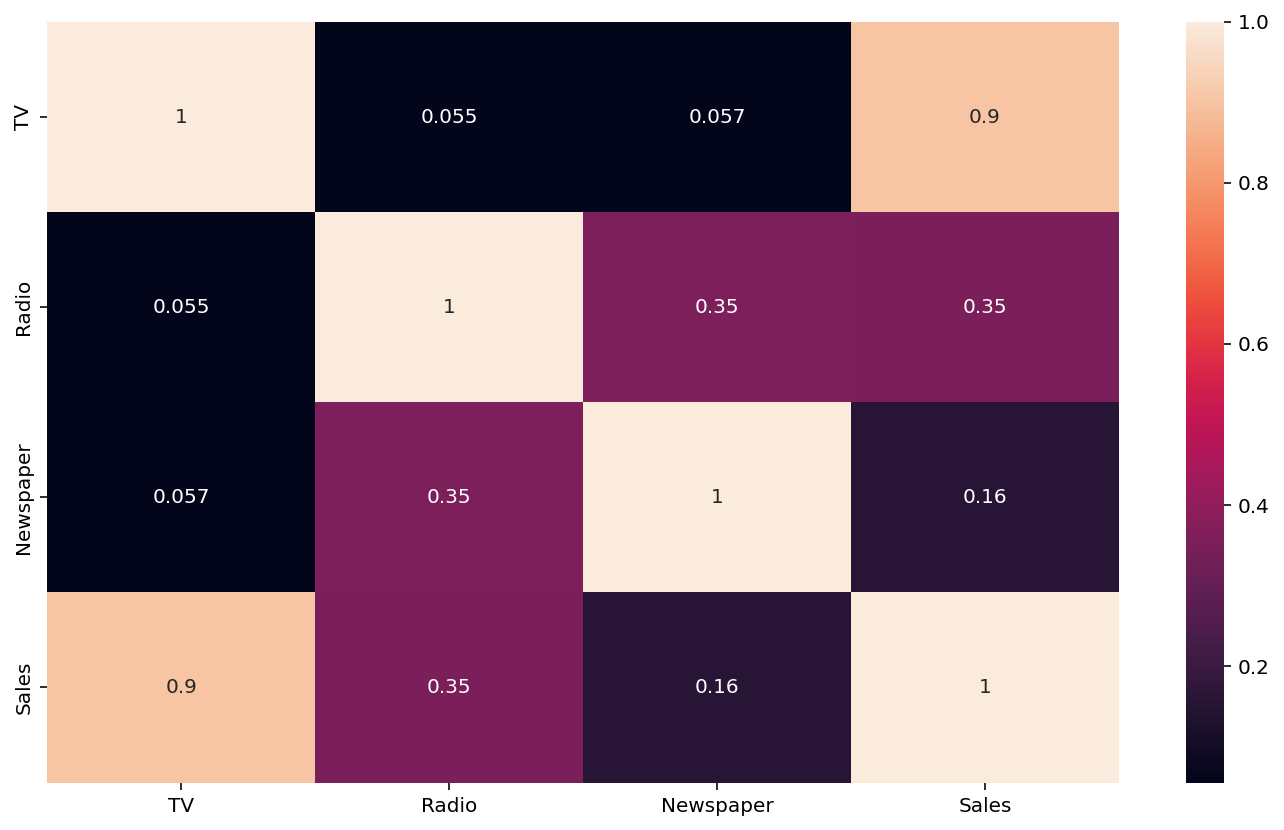

In [15]:
corr = data.corr()
sns.heatmap(corr, annot= True)
plt.show()

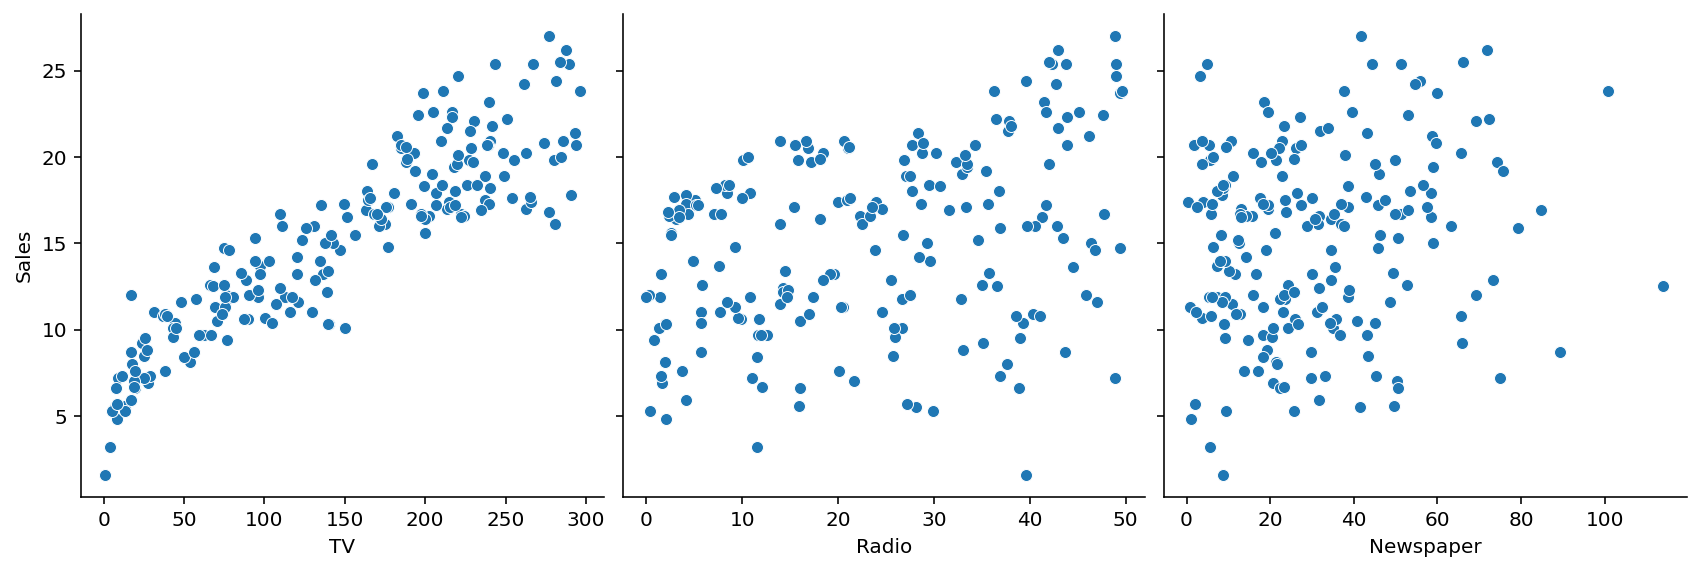

In [16]:
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)


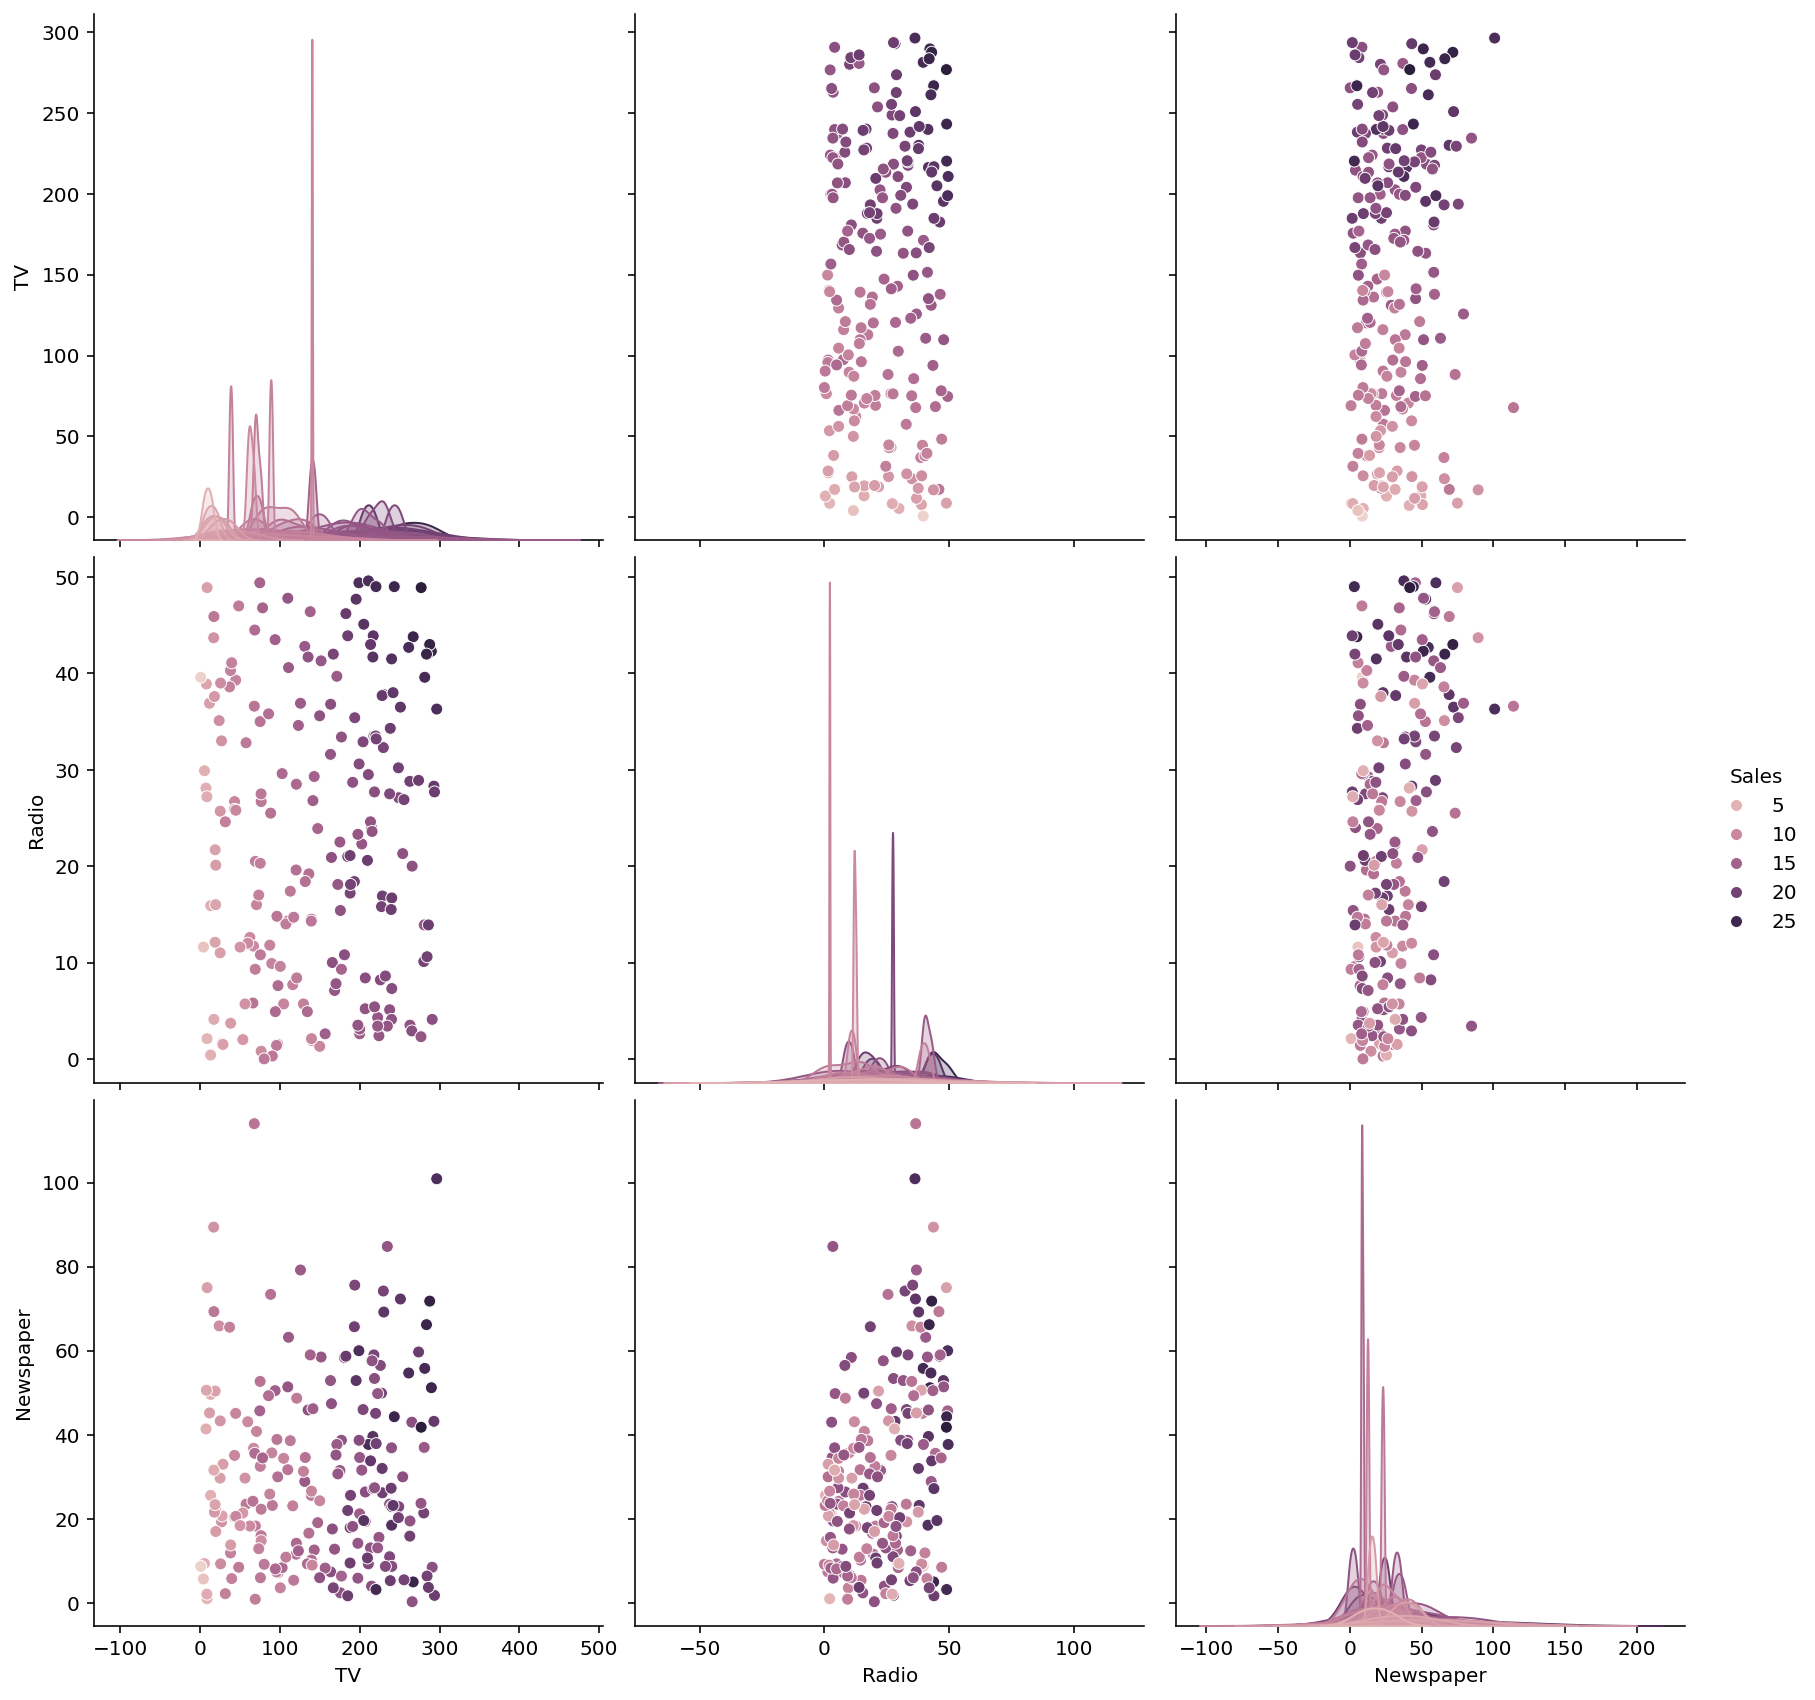

In [17]:
sns.pairplot(data, kind = 'scatter', aspect = 1, height = 4, hue='Sales')

In [18]:
#Model

In [19]:
x = data['TV']
y = data['Sales']

In [20]:
#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 120)

In [21]:
print(x_train.head())
print(y_train.head())

111    241.7
156     93.9
140     73.4
171    164.5
157    149.8
Name: TV, dtype: float64
111    21.8
156    15.3
140    10.9
171    17.5
157    10.1
Name: Sales, dtype: float64


In [22]:
import statsmodels.api as sm

In [23]:
x_train_sm = sm.add_constant(x_train)

In [24]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [25]:
lr.params

const    6.573326
TV       0.058614
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           2.24e-52
Time:                        18:10:09   Log-Likelihood:                -317.66
No. Observations:                 140   AIC:                             639.3
Df Residuals:                     138   BIC:                             645.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5733      0.396     16.582      0.0

In [27]:
# Hence Sales = 6.5733 + 0.0586*TV

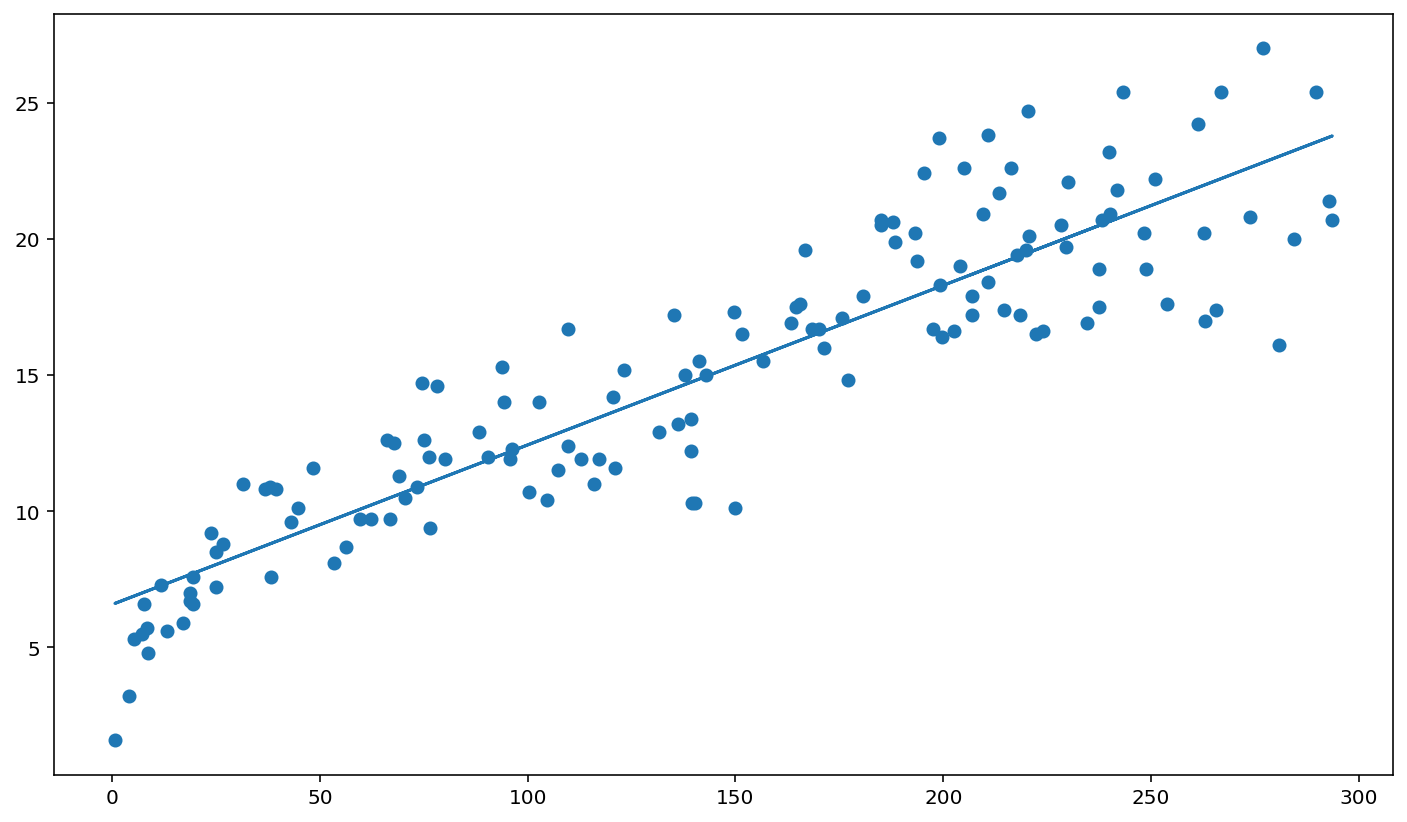

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [28]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.5733 + 0.0586*x_train)
plt.show()
plt.figure(figsize=(20,20))

In [29]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

/tmp/ipykernel_683/2530327916.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15, color = 'red')


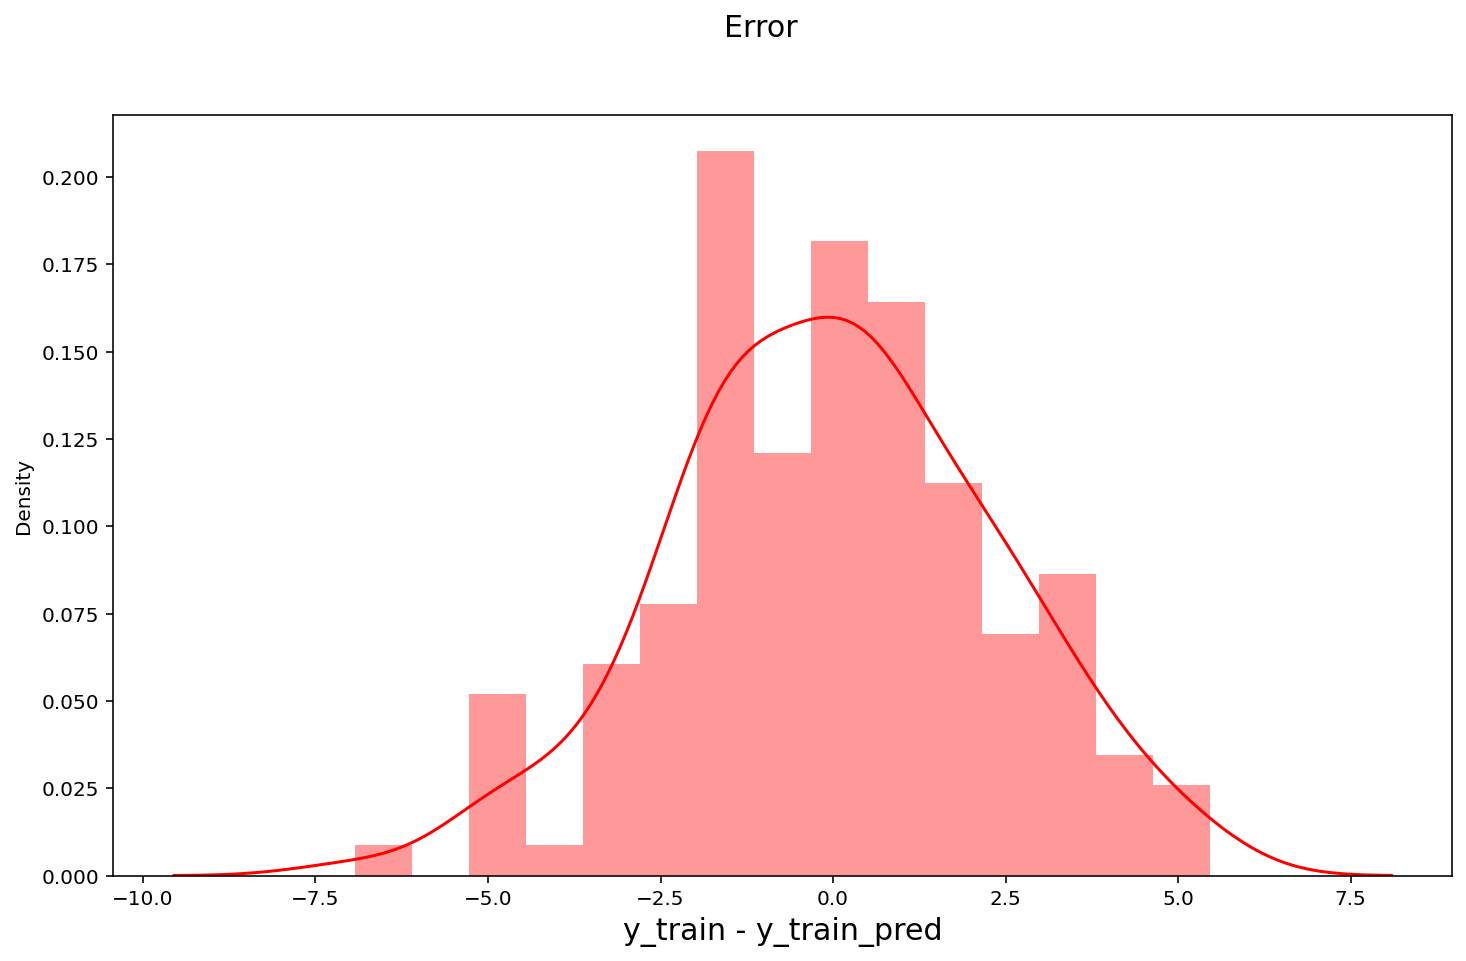

In [32]:
fig = plt.figure()
sns.distplot(res, bins = 15, color = 'red')
fig.suptitle('Error', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

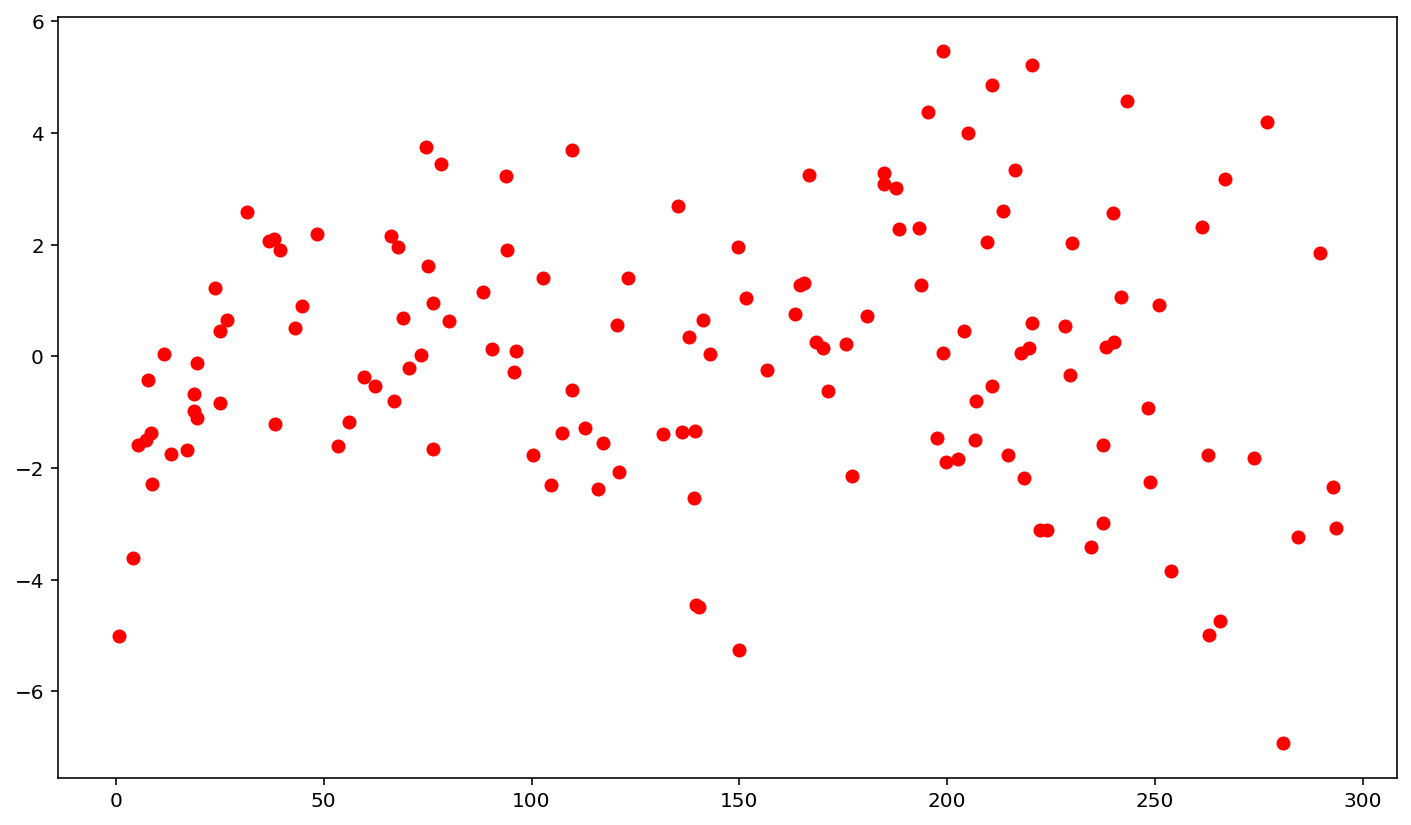

In [33]:
plt.scatter(x_train,res, c= 'red' )
plt.show()

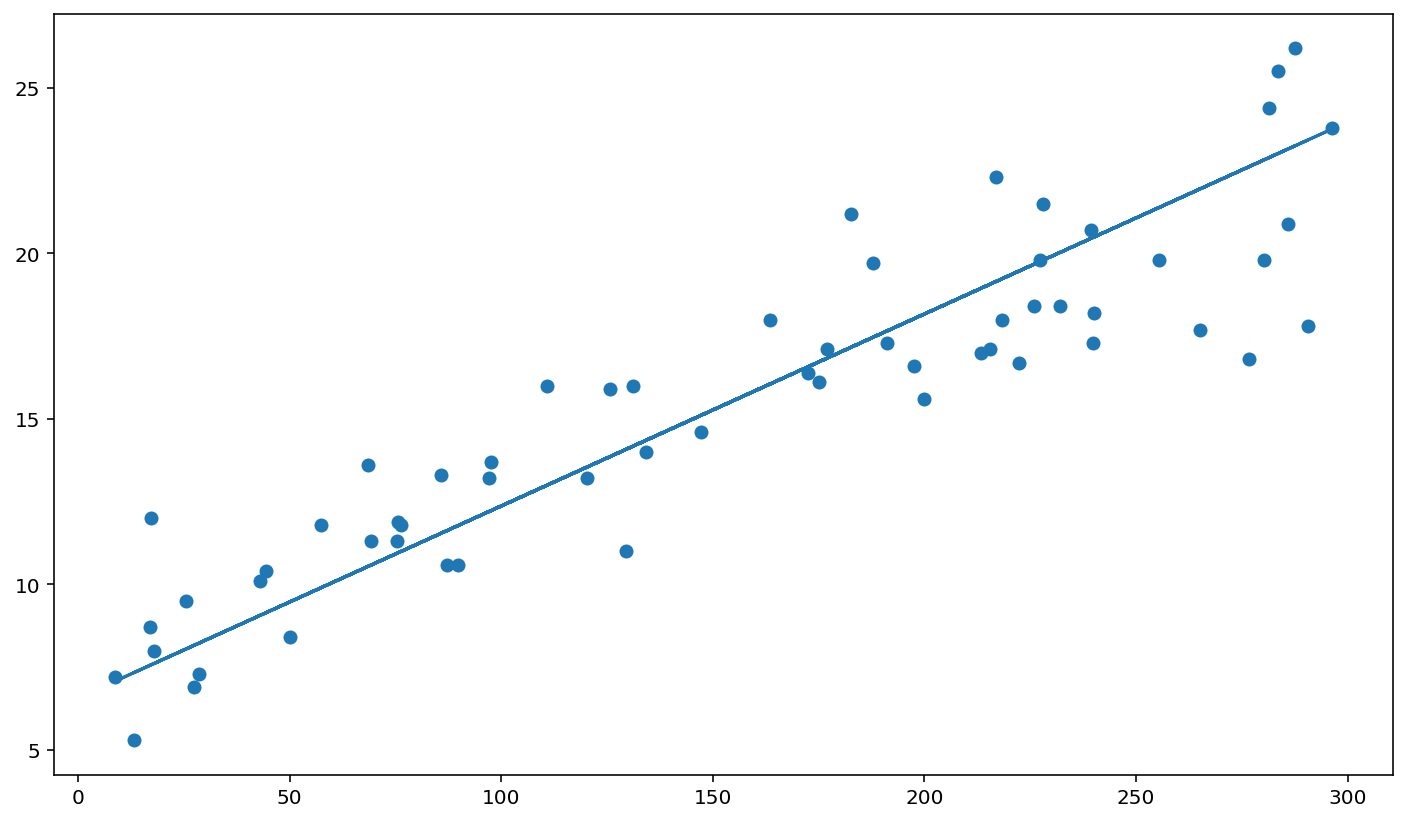

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.57 + 0.058 * x_test)
plt.show()

In [35]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [36]:
y_pred.head(10)

87     13.061903
118    13.941114
80     11.051441
198    23.196275
62     20.599672
108     7.341171
101    23.946535
199    20.177651
32     12.270613
178    22.791838
dtype: float64